## Personality Predictor

This data was collected through the PersonalityCafe forum, as it provides a large selection of people and their MBTI personality type, as well as what they have written.

#### First Dataset:
- There are 8675 observations(rows)
- Each row has 1 individual’s personality type and their last 50 posts
- The personality type shown is selected by the user although the forum has a link to the test for those members who do not know what personality type they belong to.

#### Second Dataset:
- Shows the frequency of each personality type in the population
- Data source: "MBTI Manual" published by CPP

#### Goal:
Learn more about the correlations and differences between each personality type in order to potentially utilize this information in a future project.

#### Motivation:
I find psychology very interesting, I hope to use this information in future research projects 

In [113]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter

# Always make it pretty.
plt.style.use('ggplot')

### First Dataset came in a csv so we can simply load it into a pandas DataFrame

In [526]:
raw = pd.read_csv('mbti_1 2.csv')

In [527]:
raw.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [380]:
df2 = raw

### Second dataset also came in a csv. Again, we just load it into a pandas DataFrame

In [561]:
population = pd.read_csv('TypePopulation.csv')
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
Type         16 non-null object
Frequency    16 non-null object
dtypes: object(2)
memory usage: 336.0+ bytes


In [418]:
#The Frequency column is a string, let's convert it into a float
population['Frequency'] = population['Frequency'].apply(lambda x: x.replace('%',''))

In [419]:
population['Frequency'] = population['Frequency'].astype(float)
population.head()

,Type,Frequency
0,ISFJ,13.8
1,ESFJ,12.3
2,ISTJ,11.6
3,ISFP,8.8
4,ESTJ,8.7


In [279]:
#cleaning this up so we can merge it with the dataset above
typecount = raw.groupby('type').agg({'type':'count'})
typecount['Type']=typecount.index
typecount.columns = ['Count','Type']
typecount.head()

,Count,Type
type,,
ENFJ,190,ENFJ
ENFP,675,ENFP
ENTJ,231,ENTJ
ENTP,685,ENTP
ESFJ,42,ESFJ


In [420]:
dfsummary = pd.merge(population, typecount, on='Type')
dfsummary.head()

,Type,Frequency,Count
0,ISFJ,13.8,166
1,ESFJ,12.3,42
2,ISTJ,11.6,205
3,ISFP,8.8,271
4,ESTJ,8.7,39


## Plotting frequency of personality types in our dataset against that found in the world

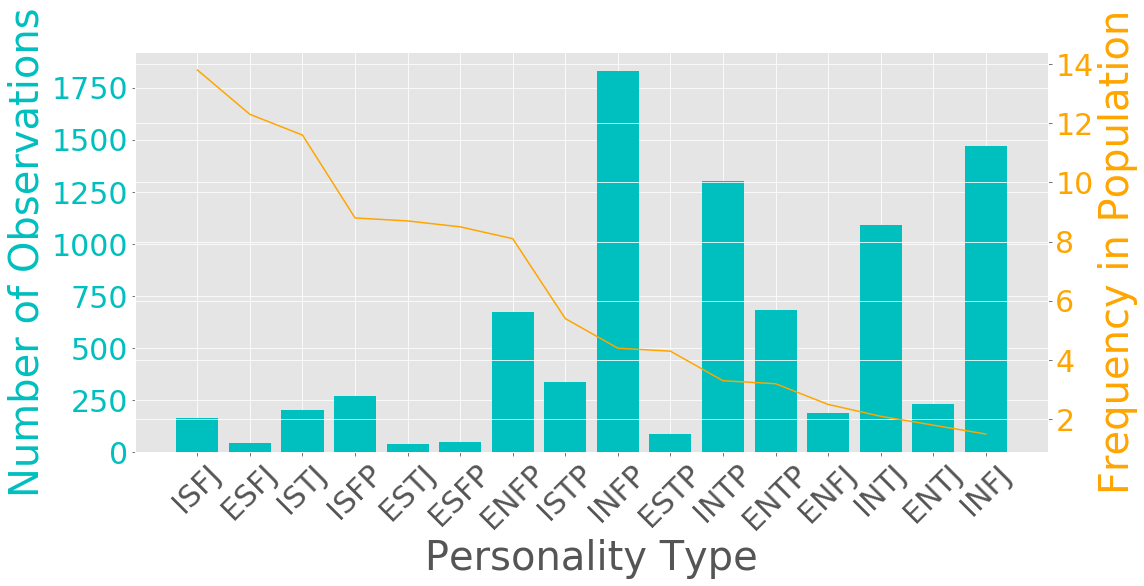

In [446]:
fig, ax1 = plt.subplots(figsize=(16,8))

color = 'c'
ax1.set_xlabel('Personality Type',size = 40)
ax1.set_ylabel('Number of Observations', color=color,size=40)
ax1.bar(dfsummary.Type,dfsummary.Count, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.yticks(size=30)
plt.xticks(rotation=45,size=30)
ax2 = ax1.twinx()

color2 = 'orange'
ax2.set_ylabel('Frequency in Population', color=color2,size=40)
ax2.plot(dfsummary.Type, dfsummary.Frequency, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
plt.yticks(size=30)
plt.xticks(rotation=45,size=30)

fig.tight_layout()
fig.savefig('samplebarvpop.png')
plt.show()

### Now that we have an idea of the data let's get some information from our raw data
- Words per comment
- Links per comment
- Questions asked per comment

In [528]:
raw['Words'] = raw['posts'].apply(lambda x: len(x.split())/50)
raw['Links'] = raw['posts'].apply(lambda x: x.count('http')/50)
raw['Questions'] = raw['posts'].apply(lambda x: x.count('?')/50)
raw.head()

,type,posts,Words,Links,Questions
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,0.48,0.36
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,0.20,0.10
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,0.10,0.24
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,0.04,0.22
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,0.12,0.20


In [323]:
Ws = raw.groupby('type').agg({'Words':'mean'})
Qs = raw.groupby('type').agg({'Questions':'mean'})
Ls = raw.groupby('type').agg({'Links':'mean'})

In [421]:
#merging our information to our summary DataFrame
dfsummary = merge_to_df(dfsummary,Qs,'Questions')
dfsummary = merge_to_df(dfsummary,Ls,'Links')
dfsummary = merge_to_df(dfsummary,Ws,'Words')

In [422]:
dfsummary.head()

,Type,Frequency,Count,Questions,Links,Words
0,ISFJ,13.8,166,0.200964,0.070602,24.825904
1,ESFJ,12.3,42,0.176190,0.027143,25.809524
2,ISTJ,11.6,205,0.214927,0.061171,24.264488
3,ISFP,8.8,271,0.216384,0.088339,22.727675
4,ESTJ,8.7,39,0.209744,0.052821,24.590769


In [427]:
#Convert our count column into a percentage
dfsummary['SampleFr'] = dfsummary['Count']/len(raw)*100
dfsummary.head()

,Type,Frequency,Count,Questions,Links,Words,SampleFr
0,ISFJ,13.8,166,0.200964,0.070602,24.825904,1.913545
1,ESFJ,12.3,42,0.176190,0.027143,25.809524,0.484150
2,ISTJ,11.6,205,0.214927,0.061171,24.264488,2.363112
3,ISFP,8.8,271,0.216384,0.088339,22.727675,3.123919
4,ESTJ,8.7,39,0.209744,0.052821,24.590769,0.449568


### Now that we've got our sample % let's compare it to the population %

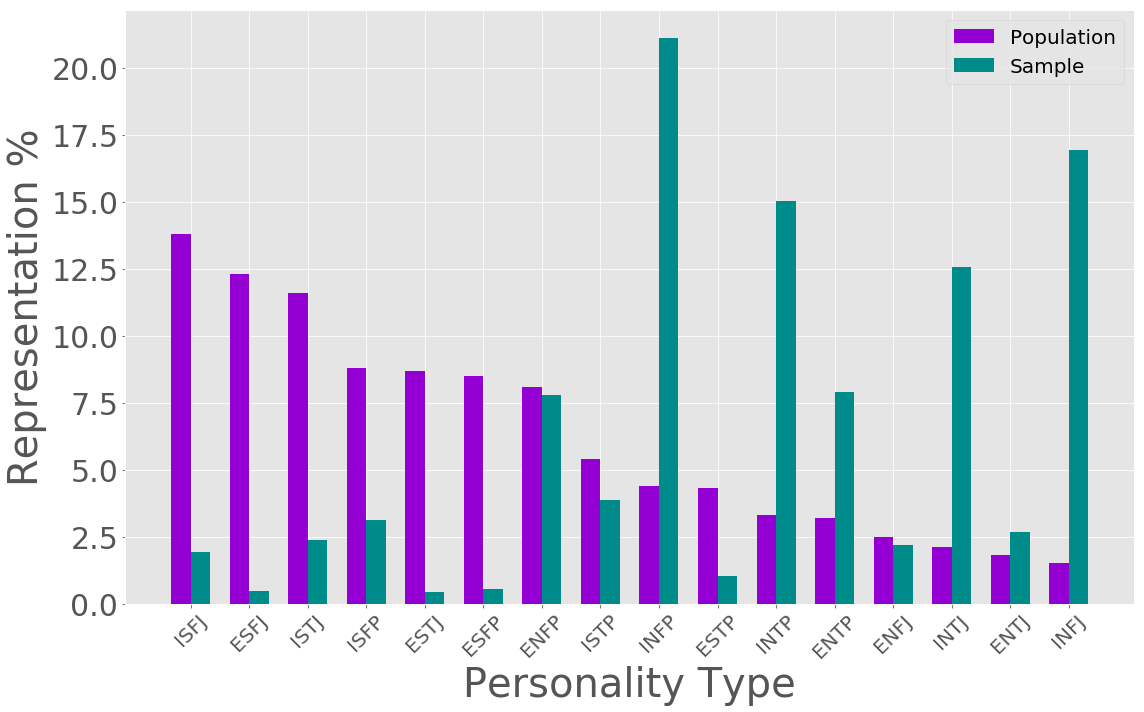

In [471]:
fig, ax1 = plt.subplots(figsize=(16,10))

indices = range(len(dfsummary.Type))
width = np.min(np.diff(indices))/3.
ax1.set_xlabel('Personality Type',size = 40)
ax1.set_ylabel('Representation %',size=40)
ax1.bar(indices-width/2.,dfsummary.Frequency,width,color='darkviolet',label='Population')
ax1.bar(indices+width/2.,dfsummary.SampleFr,width,color='darkcyan',label='Sample')
ax1.set_xticklabels(dfsummary.Type.unique())
ax1.tick_params(axis='y')

plt.yticks(size=30)
plt.xticks(range(len(dfsummary.Type)), rotation=45,size=20)
ax1.legend(prop={'size': 20})
fig.tight_layout()
fig.savefig('samplevpop.png')

Looking at the data above, we can see that having “IN” in the personality increases the chances of being active on a forum. Let's test this:

- Null hypothesis: "IN--" personalities have a higher likelyhood of being active in this online forum

In [529]:
#Adding another feature to our raw data
raw['IN'] = raw['type'].apply(lambda x: present(x,'IN'))

In [485]:
dfsummary['IN'] = dfsummary['Type'].apply(lambda x: present(x,'IN'))

In [505]:
#aggregate the information, add it to our summary
IN = dfsummary.groupby('IN').agg({'Frequency':'sum','SampleFr':'sum','Count':'sum'})
IN['Frequency'] = IN['Frequency'].astype(int)
IN

,Frequency,SampleFr,Count
IN,,,
0,89,34.32853,2978
1,11,65.67147,5697


We have a total of 8675 users, and 2978 of them are "IN--" we will test our hypothesis below, we will reject our hypothesis if we get a p-value greater than 0.05

$$ \text{# of "IN--"} \approx Binomial(8675, 0.11) $$

The central limit theorem tells us that a binomial with large $N$ is well approximated by a Normal distribution with the appropriate mean and varaince. Let's take a look at both plots belows.

$$ Binomial(8675, 0.11) \approx N(8675 \times 0.11, \sqrt{8675 \times 0.11 \times 0.89}) $$

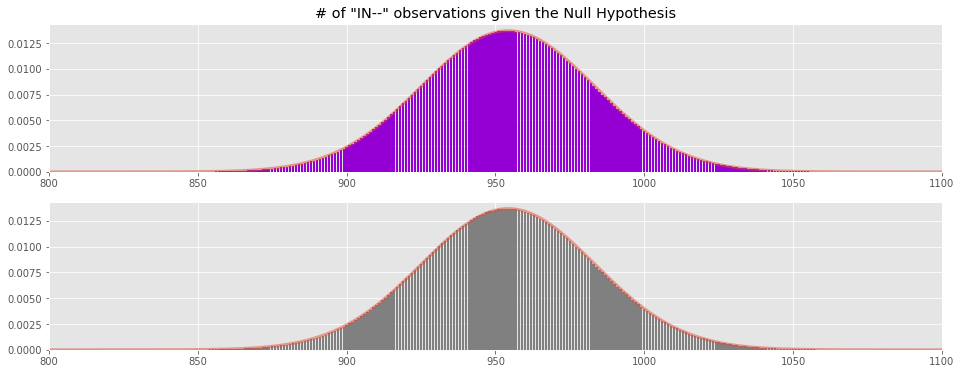

In [560]:
n = 8675
p = 0.11
binomial = stats.binom(n=n, p=p)
binomial_mean = p * n
binomial_var = n * p * (1-p)
normal_approx = stats.norm(binomial_mean, np.sqrt(binomial_var))
x = np.linspace(0, n, num =8000)

fig, axs = plt.subplots(2, figsize=(16, 6))
bar_sizes = [binomial.pmf(i) for i in range(n+1)]
bars = axs[0].bar(range(n+1), bar_sizes, color="darkviolet", align="center")
axs[0].plot(x, normal_approx.pdf(x), linewidth=3, alpha = 0.5)
axs[0].set_xlim(800, 1100)

bars = axs[1].bar(range(n+1), bar_sizes, color="grey", align="center")
axs[1].plot(x, normal_approx.pdf(x), linewidth=3, alpha = 0.5)
axs[1].set_xlim(800, 1100)

axs[0].set_title('# of "IN--" observations given the Null Hypothesis')
fig.savefig('distributions.png')

Let's continue with the Normal Distribution
The p-value for this is:

$$ P(\geq \text{ 2978 'IN--' observations} \mid \text{Null Hypothesis} ) $$

In [525]:
p_value = 1 - normal_approx.cdf(2978)
print("p-value for the experiment: {:2.6f}".format(p_value))

p-value for the experiment: 0.000000


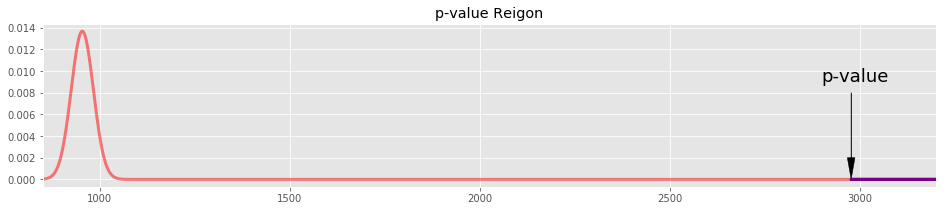

In [559]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(x, normal_approx.pdf(x), linewidth=3,color='red',alpha=0.5)
ax.set_xlim(850, 3200)
ax.fill_between(x, normal_approx.pdf(x), where=(x >= 2978), color="b",linewidth=3)
ax.arrow(2978,0.008,0.,-0.006,head_width=20, head_length=0.002, fc='black', ec='black')
ax.text(2900,0.009,'p-value', color='black', fontsize=18)
ax.set_title("p-value Reigon")
fig.savefig('pvalue.png')

### Create a dictionary with all the observations of each Personality Type

In [401]:
d={}
for ptype in raw['type'].unique():
        d[ptype]=raw.loc[raw['type'] == ptype,'posts':'posts']
        d[ptype].reset_index(drop=True, inplace=True)

### Get the word frequency by personality type

In [402]:
d2 = {}
for k,v in d.items():
    d2[k] = wordFrequency(v['posts'])
d2['INTP'].most_common(10)

[('I', 11807),
 ('', 8650),
 ("don't", 6908),
 ('or', 6879),
 ('think', 6572),
 ('do', 6235),
 ('so', 5698),
 ('if', 5636),
 ('your', 5630),
 ('at', 5580)]

#### After creating the dictionaries shown above, it made sense to create some word clouds.
- Getting the 30 most common words for all personality types

In [359]:
common_words = wordFrequency(raw['posts'])
common_words.most_common(30)

[('I', 463694),
 ('', 317599),
 ('to', 290296),
 ('the', 271111),
 ('a', 231152),
 ('and', 219676),
 ('of', 177901),
 ('you', 129537),
 ('is', 128915),
 ('that', 127521),
 ('in', 117384),
 ('my', 105005),
 ('it', 93656),
 ('for', 83151),
 ('have', 79840),
 ('with', 77180),
 ('but', 74834),
 ("I'm", 70560),
 ('be', 69359),
 ('are', 65107),
 ('like', 61449),
 ('not', 59700),
 ('an', 59057),
 ('on', 57126),
 ('was', 56169),
 ('me', 55821),
 ('as', 53400),
 ('this', 53053),
 ('just', 48449),
 ('about', 46334)]

In [376]:
#creating a list of the 30 most common words
remove = []
for item in common_words.most_common(30):
    remove.append(' '+item[0]+' ')
remove

[' I ',
 '  ',
 ' to ',
 ' the ',
 ' a ',
 ' and ',
 ' of ',
 ' you ',
 ' is ',
 ' that ',
 ' in ',
 ' my ',
 ' it ',
 ' for ',
 ' have ',
 ' with ',
 ' but ',
 " I'm ",
 ' be ',
 ' are ',
 ' like ',
 ' not ',
 ' an ',
 ' on ',
 ' was ',
 ' me ',
 ' as ',
 ' this ',
 ' just ',
 ' about ']

## Word Clouds

### Removing the most common words in order to create wordclouds

In [407]:
df2['posts'] = df2['posts'].apply(lambda x: clean_text(x))

#### Creating a word cloud for each personality type

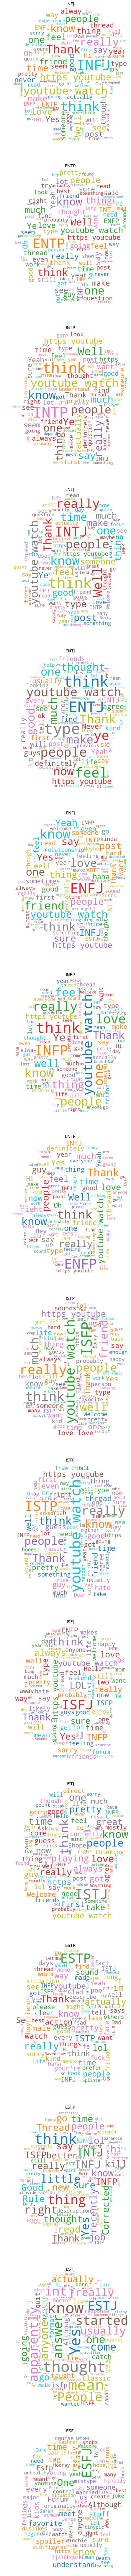

In [477]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

fig, ax = plt.subplots(len(raw['type'].unique()), sharex=True, 
                       figsize=(15,10*len(df2['type'].unique())))

x = 0 #will serve as our plot index
for i in df2['type'].unique():
    df = df2[df2['type'] == i]
    wordcloud = WordCloud(background_color="white", max_words=100, colormap="tab10",
                          mask=transformed_head_mask).generate(df['posts'].to_string())
    ax[x].imshow(wordcloud, interpolation='bilinear')
    ax[x].set_title(i)
    ax[x].axis("off")
    wordcloud.to_file("{}.png".format(i))
    x+=1

In [410]:
head_mask = np.array(Image.open("head2.png"))
head_mask[0]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [385]:
transformed_head_mask = np.ndarray((head_mask.shape[0],head_mask.shape[1], 
                                    head_mask.shape[2]),np.int32)
transformed_head_mask
for i in range(len(head_mask)):
    transformed_head_mask[i] = list(map(transform_mask, head_mask[i]))

In [386]:
transformed_head_mask[0]

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=int32)

In [350]:
dfsummary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 6 columns):
Type         16 non-null object
Frequency    16 non-null float64
Count        16 non-null int64
Words        16 non-null float64
Questions    16 non-null float64
Links        16 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ KB


In [351]:
dfsummary.describe()

,Frequency,Count,Words,Questions,Links
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,6.268750,542.187500,24.184956,0.216996,0.061377
std,4.023385,576.700756,1.342293,0.016736,0.014662
min,1.500000,39.000000,20.442500,0.176190,0.027143
25%,3.025000,146.750000,23.746481,0.209549,0.053075
50%,4.900000,251.000000,24.313110,0.215655,0.062382
75%,8.725000,786.500000,24.972146,0.223017,0.070644
max,13.800000,1832.000000,25.809524,0.245843,0.088339


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3fd8f240>,
      dtype=object)

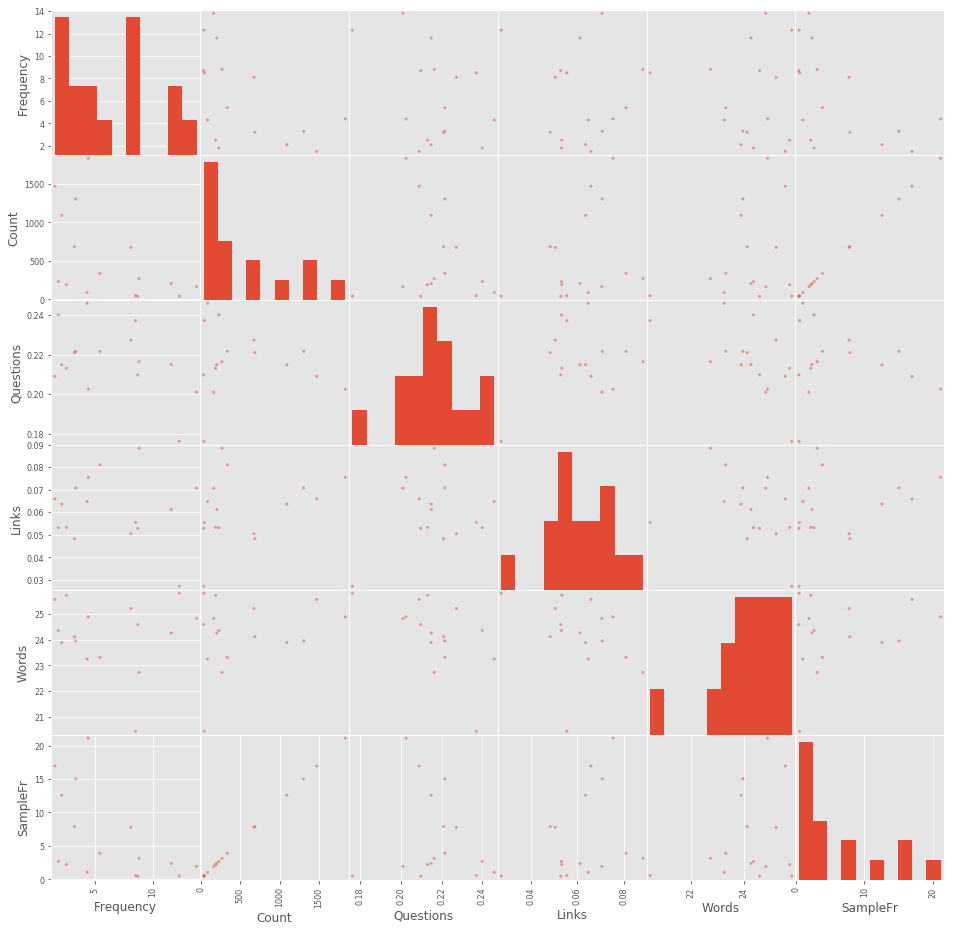

In [454]:
pd.plotting.scatter_matrix(dfsummary,figsize=(16,16))

## Functions

In [564]:
def wordFrequency(series):
    """
    Takes in the ['posts'] column and creates a dictionary of the words 
    found where the values are the frequncy of the word

    Parameters
    ----------
    series: a pandas.series

    Returns
    -------
    dictionary
    """
    count = Counter()
    for posts in series:
        pt = posts.split('|||')
        for sentance in pt:
            words = sentance.split(' ')
            for w in words:
                count[w] += 1
    return count

In [565]:
def transform_mask(matrix):
    """
    Takes a 2D Matrix in and changes the 0 values to 255

    Parameters
    ----------
    Matrix: 2D matrix

    Returns
    -------
    list
    """
    l =[]
    for n in matrix:
        if n == 0:
            l.append(255)
        else:
            l.append(n)
    return l

In [566]:
def merge_to_df(df,series,newcol):
    """
    Prepares a series to be merged with my summary df.
    Checks to see if the column exists, if it doesn't it returns
    the merged dataframe.
    
    Parameters
    ----------
    df: pandas.dataframe
    series: a pandas.series
    newcol: String
    

    Returns
    -------
    series
    """
    series['Type']=series.index
    series.coulmns = [newcol,'Type']
    if newcol in df.columns:
        return "Coloumn already in dataframe"
    else:
        return pd.merge(df, series, on='Type')

In [567]:
def clean_text(string):
    """
    Removes all common text from the line and returns a cleaned version of the line
    String.
    
    Parameters
    ----------
    series: a pandas.series

    Returns
    -------
    String
    """
    for char in remove:
        string = string.replace(char,' ')
    return string

In [568]:
def present(string,chars):
    """
    Checks if char is in string.
    
    Parameters
    ----------
    string: string

    Returns
    -------
    int: 1 for yes
         0 for no
    """
    if chars in string:
        return 1
    else:
        return 0